In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("train_news.csv")
df

,Unnamed: 0,id,headline,written_by,news,label
0,0,9653,Ethics Questions Dogged Agriculture Nominee as...,Eric Lipton and Steve Eder,"WASHINGTON — In Sonny Perdue’s telling, Geo...",0
1,1,10041,U.S. Must Dig Deep to Stop Argentina’s Lionel ...,David Waldstein,HOUSTON — Venezuela had a plan. It was a ta...,0
2,2,19113,Cotton to House: ’Do Not Walk the Plank and Vo...,Pam Key,"Sunday on ABC’s “This Week,” while discussing ...",0
3,3,6868,"Paul LePage, Besieged Maine Governor, Sends Co...",Jess Bidgood,"AUGUSTA, Me. — The beleaguered Republican g...",0
4,4,7596,A Digital 9/11 If Trump Wins,Finian Cunningham,Finian Cunningham has written extensively on...,1
...,...,...,...,...,...,...
20795,20795,5671,NaN,NeverSurrender,"No, you'll be a dog licking of the vomit of yo...",1
20796,20796,14831,Albert Pike and the European Migrant Crisis,Rixon Stewart,"By Rixon Stewart on November 5, 2016 Rixon Ste...",1
20797,20797,18142,Dakota Access Caught Infiltrating Protests to ...,Eddy Lavine,posted by Eddie You know the Dakota Access Pip...,1
20798,20798,12139,How to Stretch the Summer Solstice - The New Y...,Alison S. Cohn,"It’s officially summer, and the Society Boutiq...",0


In [3]:
#dropping unnamed column
df.drop("Unnamed: 0",axis=1,inplace=True)
df.head()

,id,headline,written_by,news,label
0,9653,Ethics Questions Dogged Agriculture Nominee as...,Eric Lipton and Steve Eder,"WASHINGTON — In Sonny Perdue’s telling, Geo...",0
1,10041,U.S. Must Dig Deep to Stop Argentina’s Lionel ...,David Waldstein,HOUSTON — Venezuela had a plan. It was a ta...,0
2,19113,Cotton to House: ’Do Not Walk the Plank and Vo...,Pam Key,"Sunday on ABC’s “This Week,” while discussing ...",0
3,6868,"Paul LePage, Besieged Maine Governor, Sends Co...",Jess Bidgood,"AUGUSTA, Me. — The beleaguered Republican g...",0
4,7596,A Digital 9/11 If Trump Wins,Finian Cunningham,Finian Cunningham has written extensively on...,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
id            20800 non-null int64
headline      20242 non-null object
written_by    18843 non-null object
news          20761 non-null object
label         20800 non-null int64
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


In [5]:
df.shape

(20800, 5)

In [6]:
df.isnull().sum()

id               0
headline       558
written_by    1957
news            39
label            0
dtype: int64

In [7]:
df.dtypes.value_counts()

object    3
int64     2
dtype: int64

In [8]:
df=df.fillna(' ')

In [9]:
#colum with all data
df['whole_text']=df['headline']+' '+df['written_by']+' '+df['news']
df.head()

,id,headline,written_by,news,label,whole_text
0,9653,Ethics Questions Dogged Agriculture Nominee as...,Eric Lipton and Steve Eder,"WASHINGTON — In Sonny Perdue’s telling, Geo...",0,Ethics Questions Dogged Agriculture Nominee as...
1,10041,U.S. Must Dig Deep to Stop Argentina’s Lionel ...,David Waldstein,HOUSTON — Venezuela had a plan. It was a ta...,0,U.S. Must Dig Deep to Stop Argentina’s Lionel ...
2,19113,Cotton to House: ’Do Not Walk the Plank and Vo...,Pam Key,"Sunday on ABC’s “This Week,” while discussing ...",0,Cotton to House: ’Do Not Walk the Plank and Vo...
3,6868,"Paul LePage, Besieged Maine Governor, Sends Co...",Jess Bidgood,"AUGUSTA, Me. — The beleaguered Republican g...",0,"Paul LePage, Besieged Maine Governor, Sends Co..."
4,7596,A Digital 9/11 If Trump Wins,Finian Cunningham,Finian Cunningham has written extensively on...,1,A Digital 9/11 If Trump Wins Finian Cunningham...


In [10]:
df['label'].value_counts()

1    10413
0    10387
Name: label, dtype: int64

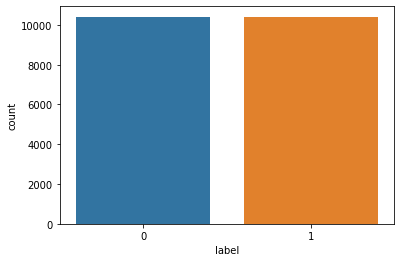

In [11]:
sns.countplot(x='label',data=df)

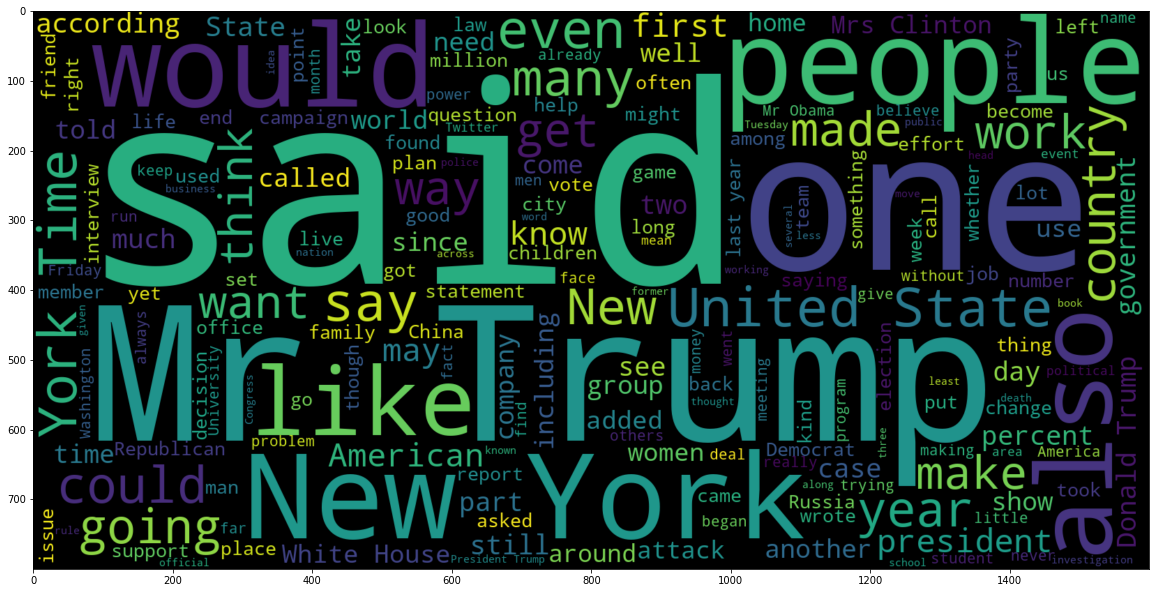

In [12]:
from nltk.corpus import stopwords
from wordcloud import WordCloud
stop_words = stopwords.words('english')
plt.figure(figsize=(20,20))
wordCloud = WordCloud(width = 1600 , height = 800 , stopwords = stop_words).generate(" ".join(df[df["label"] == 0]['whole_text']))
plt.imshow(wordCloud, interpolation = 'bilinear')

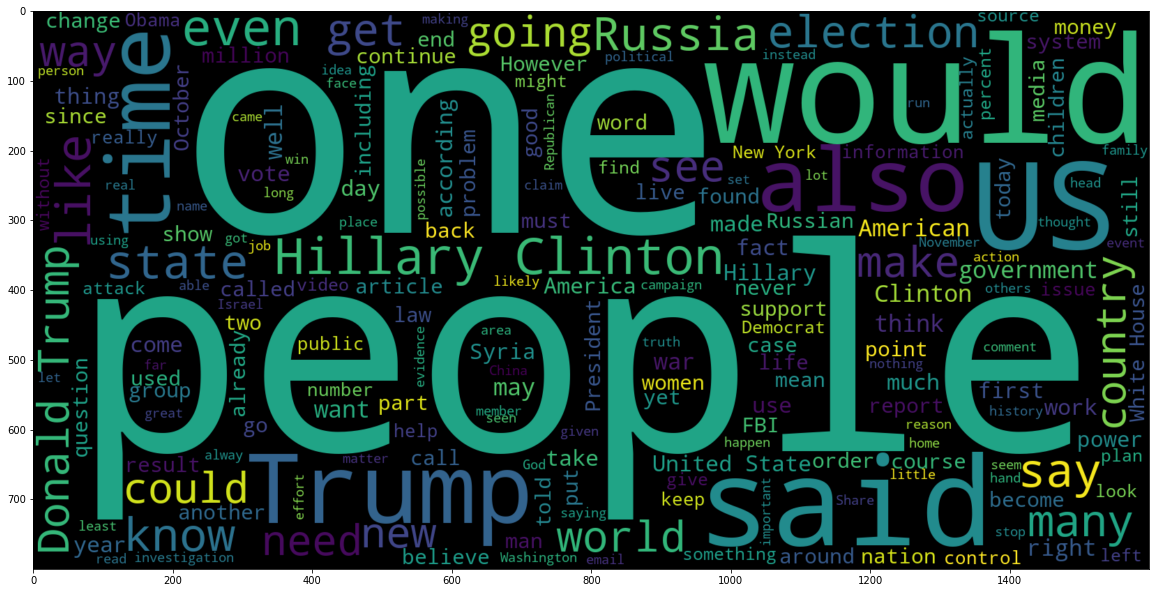

In [13]:
plt.figure(figsize=(20,20))
wordCloud = WordCloud(width = 1600 , height = 800 , stopwords = stop_words).generate(" ".join(df[df["label"] == 1]['whole_text']))
plt.imshow(wordCloud, interpolation = 'bilinear')

In [14]:
y=df['label']
y

0        0
1        0
2        0
3        0
4        1
        ..
20795    1
20796    1
20797    1
20798    0
20799    0
Name: label, Length: 20800, dtype: int64

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['whole_text'], y, test_size=0.20, random_state=42)

In [16]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
#Initialize count vectorizer
count_vec = CountVectorizer(ngram_range=(1,2),stop_words='english')
count_train = count_vec.fit_transform(X_train)
count_test = count_vec.transform(X_test)

In [17]:
#Initialize Tfidf Vectorizer
tfidf_vec = CountVectorizer(ngram_range=(1,2),stop_words='english')
tfidf_train = tfidf_vec.fit_transform(X_train)
tfidf_test = tfidf_vec.transform(X_test)

In [18]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn import metrics

#Multinomial Naive Bayes with Count Vectorizer

nb_classifier = MultinomialNB(alpha=0.1)
nb_classifier.fit(count_train,y_train)
pred_nb_count = nb_classifier.predict(count_test)
acc_nb_count = metrics.accuracy_score(y_test,pred_nb_count)
print(acc_nb_count)

0.9456730769230769


In [19]:
#Hyper parameter tuning
for alpha in np.arange(0,1,.05):
    nb_classifier_tune = MultinomialNB(alpha=alpha)
    nb_classifier_tune.fit(count_train, y_train)
    pred_tune = nb_classifier_tune.predict(count_test)
    score = metrics.accuracy_score(y_test, pred_tune)
    print("Alpha: {:.2f} Score: {:.5f}".format(alpha, score))

Alpha: 0.00 Score: 0.91851
Alpha: 0.05 Score: 0.94303
Alpha: 0.10 Score: 0.94567
Alpha: 0.15 Score: 0.94567
Alpha: 0.20 Score: 0.94495
Alpha: 0.25 Score: 0.94375
Alpha: 0.30 Score: 0.94327
Alpha: 0.35 Score: 0.94231
Alpha: 0.40 Score: 0.94183
Alpha: 0.45 Score: 0.94159
Alpha: 0.50 Score: 0.94111
Alpha: 0.55 Score: 0.94014
Alpha: 0.60 Score: 0.93870
Alpha: 0.65 Score: 0.93846
Alpha: 0.70 Score: 0.93702
Alpha: 0.75 Score: 0.93534
Alpha: 0.80 Score: 0.93462
Alpha: 0.85 Score: 0.93317
Alpha: 0.90 Score: 0.93245
Alpha: 0.95 Score: 0.93221


In [20]:
# Re-run our fine-tuned model and plot the confusion matrix
import itertools

nb_classifier = MultinomialNB(alpha = 0.15)
nb_classifier.fit(count_train, y_train)
pred_nb_count = nb_classifier.predict(count_test)
cm = metrics.confusion_matrix(y_test, pred_nb_count, labels=[0,1])
print('Confusion metrics :\n',cm)


Confusion metrics :
 [[2036   24]
 [ 202 1898]]


In [41]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization


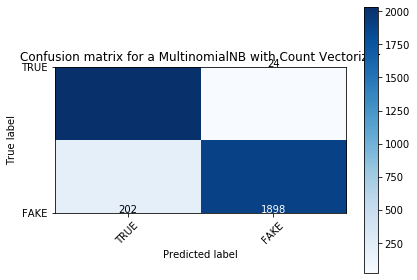

In [42]:
plot_confusion_matrix(cm, classes=['TRUE','FAKE'], title ='Confusion matrix for a MultinomialNB with Count Vectorizer')

In [43]:
# Multinomial Naive Bayes with TF-IDF Vectorizer
nb_classifier = MultinomialNB(alpha = 0.1)
nb_classifier.fit(tfidf_train, y_train)
pred_nb_tfidf = nb_classifier.predict(tfidf_test)
acc_nb_tfidf = metrics.accuracy_score(y_test, pred_nb_tfidf)
print(acc_nb_tfidf)

0.9456730769230769


In [44]:
#Hyperparameter tuning
for alpha in np.arange(0,0.1,.01):
    nb_classifier_tune = MultinomialNB(alpha=alpha)
    nb_classifier_tune.fit(tfidf_train, y_train)
    pred_tune = nb_classifier_tune.predict(tfidf_test)
    score = metrics.accuracy_score(y_test, pred_tune)
    print("Alpha: {:.2f}  Score: {:.5f}".format(alpha, score))

Alpha: 0.00  Score: 0.91851
Alpha: 0.01  Score: 0.93870
Alpha: 0.02  Score: 0.94038
Alpha: 0.03  Score: 0.94135
Alpha: 0.04  Score: 0.94183
Alpha: 0.05  Score: 0.94303
Alpha: 0.06  Score: 0.94423
Alpha: 0.07  Score: 0.94423
Alpha: 0.08  Score: 0.94519
Alpha: 0.09  Score: 0.94591


[[2036   24]
 [ 201 1899]]
Confusion matrix, without normalization


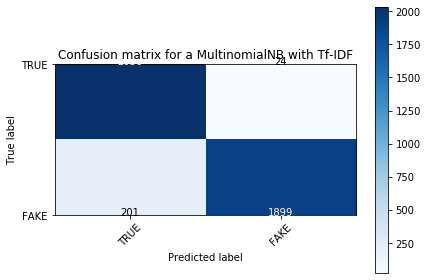

In [45]:
#Optimized model
nb_classifier = MultinomialNB(alpha = 0.09)
nb_classifier.fit(tfidf_train, y_train)
pred_nb_tfidf = nb_classifier.predict(tfidf_test)
cm2 = metrics.confusion_matrix(y_test, pred_nb_tfidf, labels=[0,1])
print(cm2)
plot_confusion_matrix(cm2, classes=['TRUE','FAKE'], title ='Confusion matrix for a MultinomialNB with Tf-IDF')

0.978125
[[2012   48]
 [  43 2057]]
Confusion matrix, without normalization


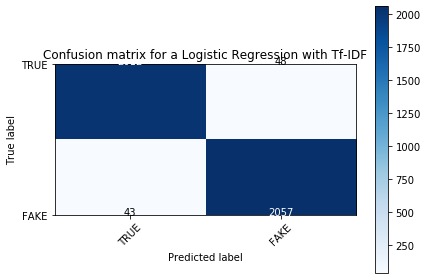

In [46]:
# Logistic Regression with TF-IDF Vectorizer
logreg = LogisticRegression(C=1e5)
logreg.fit(tfidf_train, y_train)
pred_logreg_tfidf = logreg.predict(tfidf_test)
pred_logreg_tfidf_proba = logreg.predict_proba(tfidf_test)[:,1]
acc_logreg_tfidf = metrics.accuracy_score(y_test,pred_logreg_tfidf)
print(acc_logreg_tfidf)
cm3 = metrics.confusion_matrix(y_test, pred_logreg_tfidf, labels=[0,1])
print(cm3)
plot_confusion_matrix(cm3, classes=['TRUE','FAKE'], title ='Confusion matrix for a Logistic Regression with Tf-IDF')

0.9790865384615385
[[2011   49]
 [  38 2062]]
Confusion matrix, without normalization


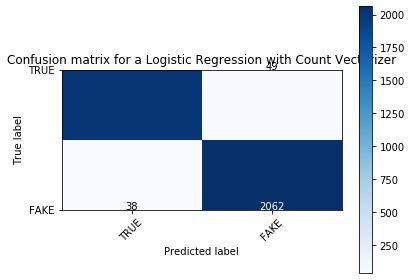

In [47]:
#Logistic Regression with CountVectorizer
logreg = LogisticRegression(C=1e5)
logreg.fit(count_train, y_train)
pred_logreg_count = logreg.predict(count_test)
acc_logreg_count = metrics.accuracy_score(y_test,pred_logreg_count)
print(acc_logreg_count)
cm4 = metrics.confusion_matrix(y_test, pred_logreg_count, labels=[0,1])
print(cm4)
plot_confusion_matrix(cm4, classes=['TRUE','FAKE'], title ='Confusion matrix for a Logistic Regression with Count Vectorizer')

0.9699519230769231
[[1987   73]
 [  52 2048]]
Confusion matrix, without normalization


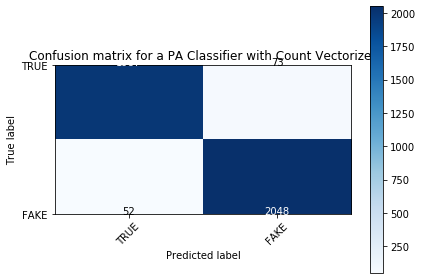

In [48]:
#Passive Agressive Classifier With Count Vectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
linear_classifier = PassiveAggressiveClassifier(max_iter=10)
linear_classifier.fit(count_train, y_train)
pred_linear_count = linear_classifier.predict(count_test)
acc_linear_count = metrics.accuracy_score(y_test, pred_linear_count)
print(acc_linear_count)
cm5 = metrics.confusion_matrix(y_test, pred_linear_count, labels=[0,1])
print(cm5)
plot_confusion_matrix(cm5, classes=['TRUE','FAKE'], title ='Confusion matrix for a PA Classifier with Count Vectorizer')

0.9697115384615385
[[1983   77]
 [  49 2051]]
Confusion matrix, without normalization


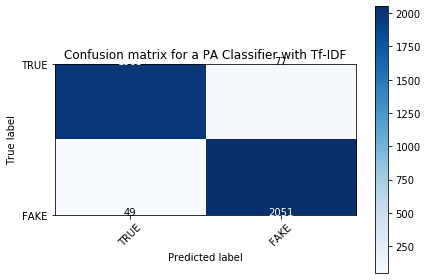

In [49]:
#Passive Agressive Classifier With TF-IDF Vectorizer
linear_classifier = PassiveAggressiveClassifier(max_iter=10)
linear_classifier.fit(tfidf_train, y_train)
pred_linear_tfidf = linear_classifier.predict(tfidf_test)
acc_linear_tfidf = metrics.accuracy_score(y_test, pred_linear_tfidf)
print(acc_linear_tfidf)
cm6 = metrics.confusion_matrix(y_test, pred_linear_tfidf, labels=[0,1])
print(cm6)
plot_confusion_matrix(cm6, classes=['TRUE','FAKE'], title ='Confusion matrix for a PA Classifier with Tf-IDF')

Selecting Logistic Regression with CountVectorizer as final model , since it has less fake news labeled as true news and also it maximizes accuracy.